# Import library yang diperlukan

In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Meload dataset
df = pd.read_csv("bank.csv",sep=';')

In [3]:
#Melihat data teratas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#Melihat dimensi data
df.shape

(4521, 17)

In [5]:
#Melihat type data column
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Membuat visualisasi Data

In [6]:
#Melihat jumlah pekerjaan
job_count = df['job'].value_counts()
job_count

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0.5, 1.0, 'Tipe Pekerjaan')

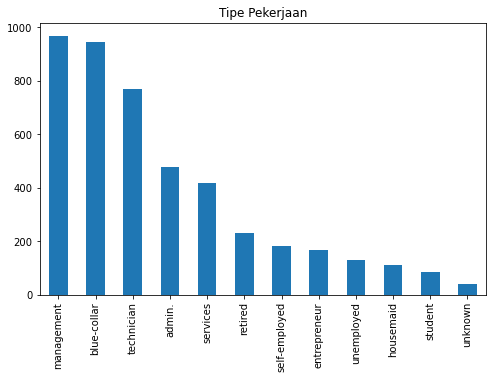

In [7]:
plt.figure(figsize = (8, 5))
job_count.plot(kind = "bar")
plt.title("Tipe Pekerjaan")

In [8]:
#Melihat status
marital_count = df['marital'].value_counts()
marital_count

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

[Text(0.5, 1.0, 'Distribusi Status')]

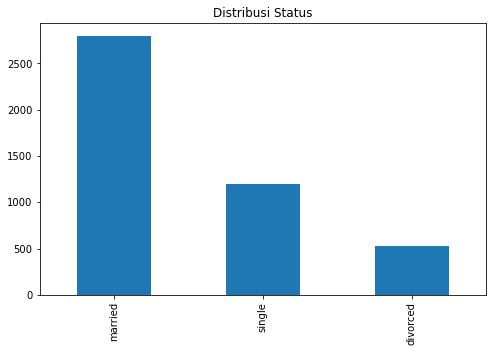

In [9]:
plt.figure(figsize = (8, 5))
marital_count.plot(kind = "bar").set(title = "Distribusi Status")

# Data Preprocessing

In [10]:
#Mengubah column default
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)

In [11]:
#Mengubah column housing
df['is_housing'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)

In [12]:
#mengubah column loan
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [13]:
#Mengubah column y
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)

# Membuat one hot encoding

In [14]:
#column martial/status
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
pd.concat([df['marital'], marital_dummies], axis=1).head(n=10)

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,married,0,1,0
2,single,0,0,1
3,married,0,1,0
4,married,0,1,0
5,single,0,0,1
6,married,0,1,0
7,married,0,1,0
8,married,0,1,0
9,married,0,1,0


In [15]:
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [16]:
df = pd.concat([df, marital_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,is_default,is_housing,is_loan,target,marital_married,marital_single
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,-1,0,unknown,no,0,0,0,0,1,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,339,4,failure,no,0,1,1,0,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,330,1,failure,no,0,1,0,0,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,-1,0,unknown,no,0,1,1,0,1,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,-1,0,unknown,no,0,1,0,0,1,0


In [17]:
#COlom pekerjaan
job_dummies = pd.get_dummies(df['job'], prefix = 'job')

In [18]:
job_dummies.drop('job_unknown', axis=1, inplace=True)
df = pd.concat([df, job_dummies], axis=1)

In [19]:
#Colomn pendidikan
education_dummies = pd.get_dummies(df['education'], prefix = 'education')

In [20]:
education_dummies.drop('education_unknown', axis=1, inplace=True)
df = pd.concat([df, education_dummies], axis=1)

In [21]:
#COlumn kontak
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')

In [22]:
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
df = pd.concat([df, contact_dummies], axis=1)

In [23]:
#COlumn poutcome
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')

In [24]:
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
df = pd.concat([df, poutcome_dummies], axis=1)

In [25]:
#column bulan menjadi numerik
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)

In [26]:
#column pdays
df[df['pdays'] == -1]['pdays'].count()

3705

In [27]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [28]:
#menghapus column yang tidak diperlukan diantaranya: job, education, default, housing, loan, contact, month, pdays, poutcome, y
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)

In [29]:
#melihat type data column
df.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
was_contacted          int64
dtype: object

In [30]:
#Menentukan colomn feature dan target
X = df.drop('target', axis=1)
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# Pembuatan Model

In [41]:
#memilih model logistic regression karena data yang ada sesuai dengan algoritma yaitu kalsifikasi biner
model = LogisticRegression()

In [34]:
#Pelatihan Model
model.fit(X_train, y_train)

/home/lesmana/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
#Membuat Prediksi
y_pred = model.predict(X_test)

In [40]:
#Melihat accuarcy model
accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Akuarasi dari model logistic regression adalah sebesar {accuracy*100:.2f}%')

Akuarasi dari model logistic regression adalah sebesar 89.83%
